<a href="https://colab.research.google.com/github/Barttje/summercourse-ml/blob/master/neural_network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codecentric Summercourse ML 
This is part one of the summercourse ML organised by Codecentric. 
## Neural network
In this tutorial we are going to explain how to create a neural network in Keras that is used for classifying the MNIST fashion data set. This is a dataset of 60.000 Zalando's article images.
Each training and test example is assigned to one of the following labels:
0. T-Shirt
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot 

More information about the data set can be found [here](https://www.kaggle.com/zalando-research/fashionmnist).


#Imports

In [0]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt

#Data preprocessing

In [2]:
labels = {0:"T-Shirt", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}
print(labels[2])

Pullover


Create a mapper to translate the labels to actual readable names.

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


The load_data() function on the dataset can be used for the datasets that are included in Keras. The other datasets that can be loaded in the same way can be found on the [Keras website](https://keras.io/datasets/). 
The load_data() function returns the train and test data set for the MNIST fashion data set. Both the test and train data are divided in two parts, the image and the label. x_train contains all the images we are going to use to train the neural network. The y_train contains all the labels for those images. 


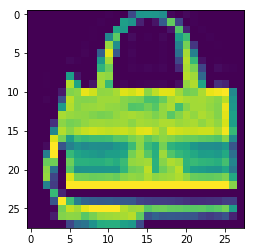

8
Bag


In [4]:
image_index = 9432 # Can be any number between 0 and 59999

plt.imshow(x_train[image_index])
plt.show()
print(y_train[image_index])
print(labels[y_train[image_index]])

The *matplotlib.pyplot as plt* can be used to show the images in the dataset. 
We also print the label of that image, which is a number between 1 and 9. Using the mapping we created earlier we can convert this number to the actual name of the label. 


In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train[0][0][1])

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
0


In machine learning it is really important to understand and have a feeling for the shapes of the data. 
Since we need to make sure the input data matches the first layer of the model.  Above we printed the shape of each data. For x_train this is (60000, 28, 28). This means we have a three-dimensional array that contains 60.000 * 28 * 28 data points (~47 million). The 60.000 are the number of images we have in the dataset. The 28, 28 are the height and the width of the images in pixels. Each datapoint is a number between 0 and 255, which represents the color of that pixel. 

The y_train is (60000,)  is a array with 60.000 datapoints. Each datapoint represent the label of the image and is a number between 1 and 9. 

In [6]:
image_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_size) # Transform from matrix to vector
x_train = x_train.astype('float32')
x_train /= 255 # Normalize inputs from 0-255 to 0.0-1.0

x_test = x_test.reshape(x_test.shape[0], image_size) # Transform from matrix to vector
x_test = x_test.astype('float32')
x_test /= 255 # Normalize inputs from 0-255 to 0.0-1.0

print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


The neural network that we are creating is not expecting two dimensional data. So we have translate the input data into a format the neural network can handle. So we can use the reshape function to change the format into a one dimensional array. Furthermore we normalize the data between 0.0 and 1.0, by dividing by 255. 

In [7]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape, y_test.shape)
print(y_train[0])

(60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#Creating and training the neural network

In [26]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(image_size,))) # Input layer
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax')) # Output layer
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Explain layers in the model

In [27]:
epochs = 10
history = model.fit(x_train, y_train, validation_split=0.8, epochs=epochs)

Train on 11999 samples, validate on 48001 samples
Epoch 1/10
11999/11999 [==============================] - 6s 508us/step - loss: 0.7409 - acc: 0.7363 - val_loss: 0.4956 - val_acc: 0.8248
Epoch 2/10
11999/11999 [==============================] - 6s 481us/step - loss: 0.5354 - acc: 0.8048 - val_loss: 0.4721 - val_acc: 0.8328
Epoch 3/10
11999/11999 [==============================] - 6s 505us/step - loss: 0.4878 - acc: 0.8210 - val_loss: 0.4413 - val_acc: 0.8402
Epoch 4/10
11999/11999 [==============================] - 6s 481us/step - loss: 0.4470 - acc: 0.8383 - val_loss: 0.4315 - val_acc: 0.8418
Epoch 5/10
11999/11999 [==============================] - 6s 476us/step - loss: 0.4291 - acc: 0.8447 - val_loss: 0.4300 - val_acc: 0.8456
Epoch 6/10
11999/11999 [==============================] - 6s 477us/step - loss: 0.4071 - acc: 0.8485 - val_loss: 0.3894 - val_acc: 0.8577
Epoch 7/10
11999/11999 [==============================] - 6s 482us/step - loss: 0.3883 - acc: 0.8542 - val_loss: 0.4197 - 

explain epochs, optionally batch_size, learning rate etc.

In [19]:
loss, accuracy  = model.evaluate(x_test, y_test)
print(loss, accuracy)

10000/10000 [==============================] - 1s 55us/step
0.4250919180750847 0.888


explain loss and accuracy

#Applying the model

[[2.0900288e-17 1.0000000e+00 1.6169606e-24 8.0276289e-12 2.8700487e-15
  7.9384296e-32 1.3185753e-12 3.1529854e-38 7.6226814e-22 1.6400401e-37]]
1 Trouser
1 Trouser


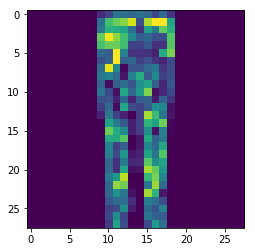

In [20]:
index = 4
pred = model.predict(x_test[-index:-index+1]) 
print(pred)
print(pred.argmax(), labels[pred.argmax()])
print(y_test[-index:-index+1].argmax(), labels[y_test[-index:-index+1].argmax()] )
plt.imshow(x_test[-index:-index+1][0].reshape(28,28))



explain prediction, explain arg max, compare with actual class

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


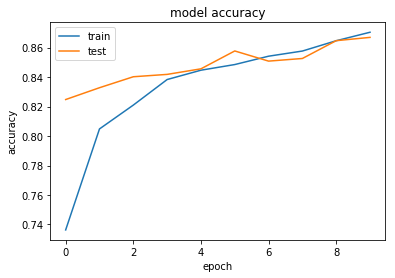

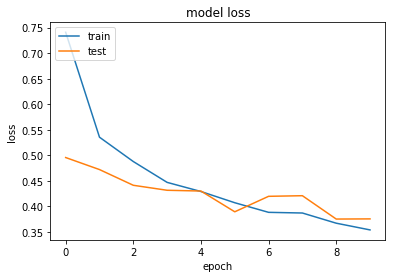

In [28]:
print(history.history.keys())
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()